<a href="https://colab.research.google.com/github/percyfikri/PCVK-Pengolahan-Citra-dan-Visi-Komputer-/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


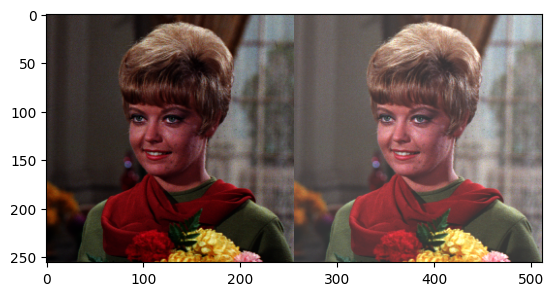

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')

try:
  brightness=int(input("Masukkan nilai kecerahan: "))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff'), cv.COLOR_BGR2RGB)
brightness_image=np.zeros(original.shape,original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c]=np.clip(original[y,x,c]+brightness,0,255)

#brightness_image=cv.convertScaleAbs(original,beta=brightness)

final_frame=cv.hconcat((original,brightness_image))
plt.imshow(final_frame)

### TUGAS PRAKTIKUM

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

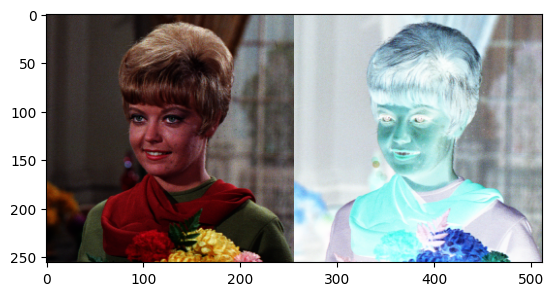

In [4]:
original = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff'), cv.COLOR_BGR2RGB)

brightness_image=np.zeros(original.shape,original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c]= 255 - np.clip(original[y,x,c],0,255)

#brightness_image = 255 - original

final_frame=cv.hconcat((original,brightness_image))
plt.imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut:


Mengubah tingkat kecerahan dan kontras citra
--------------------------------
Masukkan nilai kecerahan (-255 - 255): 50
Masukkan nilai kontras (1.0 - 3.0): 2


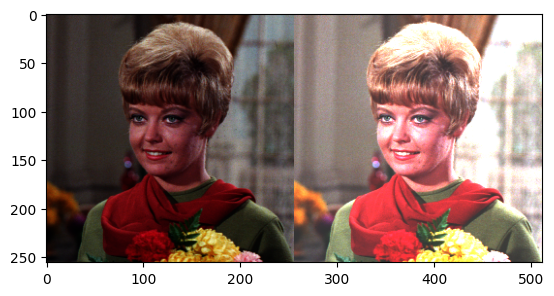

In [17]:
print('Mengubah tingkat kecerahan dan kontras citra')
print('--------------------------------')

try:
  brightness=int(input("Masukkan nilai kecerahan (-255 - 255): "))
  contrast=int(input("Masukkan nilai kontras (1.0 - 3.0): "))

except ValueError:
  print('Error, not a number')

original = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff'), cv.COLOR_BGR2RGB)
filtered_image=np.zeros(original.shape,original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      filtered_image[y,x,c]= np.clip(contrast*(original[y,x,c])+brightness,0,255)

# filtered_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

final_frame=cv.hconcat((original,filtered_image))
plt.imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra dengan transformasi log
--------------------------------
Masukkan nilai kecerahan (-255 - 255): 50


(-0.5, 255.5, 255.5, -0.5)

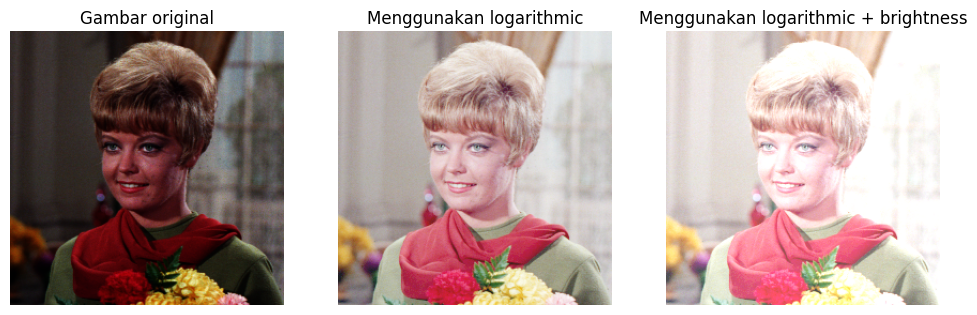

In [18]:
print('Mengubah tingkat kecerahan citra dengan transformasi log')
print('--------------------------------')
try:
  brightness=int(input("Masukkan nilai kecerahan (-255 - 255): "))

except ValueError:
  print('Error, not a number')

original = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff'), cv.COLOR_BGR2RGB)
logarithmic_image=np.zeros(original.shape,original.dtype)
brightness_image=np.zeros(original.shape,original.dtype)

konstanta = (255 / np.log(1+original.max()))
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      logarithmic_image[y,x,c]=np.clip(konstanta * np.log(1+original[y,x,c]) ,0,255)
      brightness_image[y,x,c]=np.clip(konstanta * np.log(1+original[y,x,c])+brightness ,0,255)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(original)
axs[0].set_title('Gambar original')
axs[0].axis('off')
axs[1].imshow(logarithmic_image)
axs[1].set_title('Menggunakan logarithmic')
axs[1].axis('off')
axs[2].imshow(brightness_image)
axs[2].set_title('Menggunakan logarithmic + brightness')
axs[2].axis('off')

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

Transformasi grayscale menggunakan averaging, lightness, dan luminance
--------------------------------


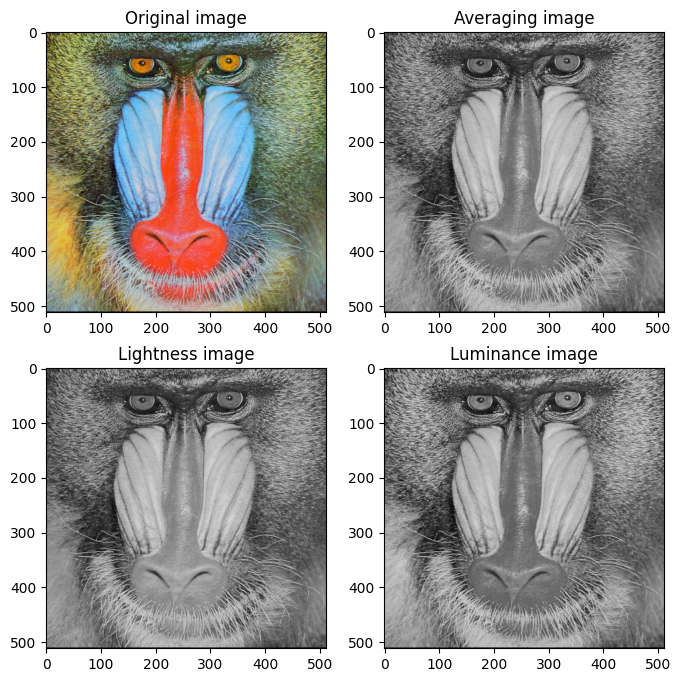

In [19]:
print('Transformasi grayscale menggunakan averaging, lightness, dan luminance')
print('--------------------------------')

def averaging_gray(image):
  filtered_image=np.zeros(image.shape,image.dtype)
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      r,g,b=image[y,x]
      avg= int((int(r) + int(g) + int(b))/3)
      filtered_image[y,x]=avg
  return filtered_image

def lightness_gray(image):
    filtered_image=np.zeros(image.shape,image.dtype)
    for y in range(image.shape[0]):
      for x in range(image.shape[1]):
        r,g,b=image[y,x]
        maximum = max(r,g,b)
        minimum = min(r,g,b)
        lightness = int((int(maximum) + int(minimum)) / 2)
        filtered_image[y,x] = lightness
    return filtered_image

def luminance_gray(image):
    filtered_image=np.zeros(image.shape,image.dtype)
    for y in range(image.shape[0]):
      for x in range(image.shape[1]):
        r=image[y,x,0]*0.21
        g=image[y,x,1]*0.72
        b=image[y,x,2]*0.07
        luminance=r+g+b
        filtered_image[y,x]=luminance
    return filtered_image

original = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff'), cv.COLOR_BGR2RGB)

averaging_image=averaging_gray(original)
lightness_image=lightness_gray(original)
luminance_image=luminance_gray(original)


fig, ax = plt.subplots(2, 2, figsize=(8,8))
ax[0,0].set_title('Original image')
ax[0,0].imshow(original)

ax[0,1].set_title('Averaging image')
ax[0,1].imshow(averaging_image)

ax[1,0].set_title('Lightness image')
ax[1,0].imshow(lightness_image)

ax[1,1].set_title('Luminance image')
ax[1,1].imshow(luminance_image)

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

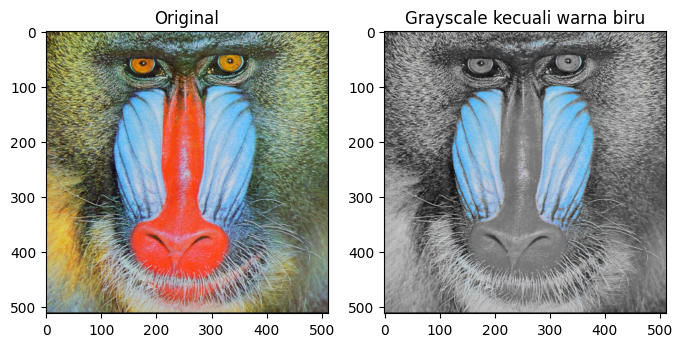

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

original = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
rgb_image = cv.cvtColor(original, cv.COLOR_BGR2RGB)

filtered_image = np.copy(rgb_image)

for y in range(rgb_image.shape[0]):
    for x in range(rgb_image.shape[1]):
        r, g, b = rgb_image[y, x]
        if (r >= 0 and r <= 255) and (g >= 0 and g <= 220) and (b >= 0 and b <= 200):
            # Ubah warna ke grayscale
            grayscale_value = int(0.2989 * r + 0.5870 * g + 0.1140 * b)
            filtered_image[y, x] = [grayscale_value, grayscale_value, grayscale_value]

fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].set_title('Original')
ax[0].imshow(rgb_image)

ax[1].set_title('Grayscale kecuali warna biru')
ax[1].imshow(filtered_image)

plt.show()
